In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [3]:
plt.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#00A321","#5C3993", "#E28413", '#A31621', "#009FFD", '#F551A8', '#0F9E7A']))
priv_palette=sns.color_palette(["#00A321", "#00CC29", "#00F531", "#1FFF4B"])
unpriv_palette=sns.color_palette(["#5C3993","#6E45B0","#835DC0","#9A7BCC"])
MR_palette=sns.color_palette(["#A31621","#C51B29","#E22837","#E74B58"])
SES_palette=sns.color_palette(["#E28413","#ED9831","#F0AB56","#F4BE7C"])

In [5]:
exp_name = 'exp17A'
results_dir = '/home/emma/Documents/BC_Sim/results/' + exp_name + '/'

#import results for each AI fairness scenario
stats_df1 = pd.read_csv(results_dir + 'naive.csv', index_col=0)
stats_df2 = pd.read_csv(results_dir + 'EqOppFPR.csv', index_col=0)
stats_df3 = pd.read_csv(results_dir + 'EqOppTPR.csv', index_col=0)
stats_df4 = pd.read_csv(results_dir + 'EqOdds.csv', index_col=0)

In [6]:
stats_df = pd.concat([stats_df1, stats_df2, stats_df3, stats_df4])

In [7]:
stats_df = stats_df.replace({'naive': 'Naive'}) #capitalize Naive for plotting purposes
stats_df

,year,n_priv,n_unpriv,n_healthy_priv,n_healthy_unpriv,n_BC_priv,n_BC_unpriv,n_died_priv,n_died_unpriv,n_screened_priv,...,screen_ratio,lost_to_followup_frac,lost_to_followup_ratio,delay_ratio,delay_frac,t2_ratio,t2_frac,average_age_in_pool,n_sim,ai_fairness
0,0,250000,250000,249347,249259,653,741,50,140,249936,...,0.659297,0.095129,1.037288,2.304348,0.205405,0.537530,0.858108,57.505605,233227757,Naive
1,1,250091,249909,249217,248868,874,1041,89,381,246548,...,0.663218,0.096727,1.018789,2.316667,0.204733,0.451786,0.836420,57.554440,233227757,Naive
2,2,250173,249827,249320,248852,853,975,96,320,246676,...,0.663717,0.097016,1.069787,2.193548,0.204969,0.517824,0.837474,57.581433,233227757,Naive
3,3,250198,249802,249346,248802,852,1000,100,355,246865,...,0.659903,0.096929,1.061860,1.662338,0.213764,0.449168,0.817518,57.636545,233227757,Naive
4,4,250387,249613,249494,248598,893,1015,101,340,246917,...,0.659307,0.099441,1.036401,1.905405,0.217611,0.512015,0.827935,57.692079,233227757,Naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,46,251407,248593,250523,247564,884,1029,117,341,248555,...,0.644839,0.119574,2.043807,2.365079,0.218332,0.490530,0.810505,58.144626,3445858407,EqOdds
5096,47,251406,248594,250530,247606,876,988,98,341,248639,...,0.643173,0.117086,2.014278,1.645570,0.223529,0.507663,0.841711,58.184606,3445858407,EqOdds
5097,48,251411,248589,250547,247528,864,1061,106,342,248650,...,0.642972,0.116066,2.000549,2.222222,0.210363,0.558648,0.812435,58.246382,3445858407,EqOdds
5098,49,251382,248618,250460,247586,922,1032,101,348,248616,...,0.644327,0.120342,2.050108,2.230769,0.211055,0.450091,0.803015,58.297595,3445858407,EqOdds


In [8]:
#compute derived metrics
#group mortality rates
stats_df['MR_priv'] = stats_df['n_died_priv']/stats_df['n_priv']*1e5
stats_df['MR_unpriv'] = stats_df['n_died_unpriv']/stats_df['n_unpriv']*1e5
stats_df['deltaMR'] = stats_df['MR_unpriv']-stats_df['MR_priv']
stats_df['MR_ratio'] = stats_df['MR_unpriv']/stats_df['MR_priv']

#percent change in group avg SEI
stats_df['change_SEI_avg_priv'] = stats_df['SEI_avg_priv'].pct_change()*100
stats_df['change_SEI_avg_unpriv'] = stats_df['SEI_avg_unpriv'].pct_change()*100

# #percent change in group median SEI
# stats_df['change_SEI_med_priv'] = stats_df['SEI_med_priv'].pct_change()*100
# stats_df['change_SEI_med_unpriv'] = stats_df['SEI_med_unpriv'].pct_change()*100


#inter-group deltaSEI
stats_df['inter_dSEI'] = np.absolute(stats_df['SEI_avg_priv']-stats_df['SEI_avg_unpriv'])

#percent change in inter-group deltaSEI 
stats_df['change_inter_dSEI'] = stats_df['inter_dSEI'].pct_change()*100

#intra-group deltaSEI
stats_df['intra_dSEI_priv'] = stats_df['SEI_max_priv']-stats_df['SEI_min_priv']
stats_df['intra_dSEI_unpriv'] = -stats_df['SEI_max_unpriv']-stats_df['SEI_min_unpriv']

In [9]:
def plt_MR(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(8,6))
    sns.lineplot(data=df, x ='year', y='MR_priv', style='ai_fairness')
    sns.lineplot(data=df, x ='year', y='MR_unpriv', style='ai_fairness')
    plt.title(f'Annual Mortality Rate')
    plt.xlabel('Years')
    plt.ylabel('Mortality Rate (per 100k)')
    plt.xlim([1,50])
    # plt.ylim([100,140])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'MR.png', dpi=800)
        plt.savefig(results_dir + 'MR.svg')
    plt.show()

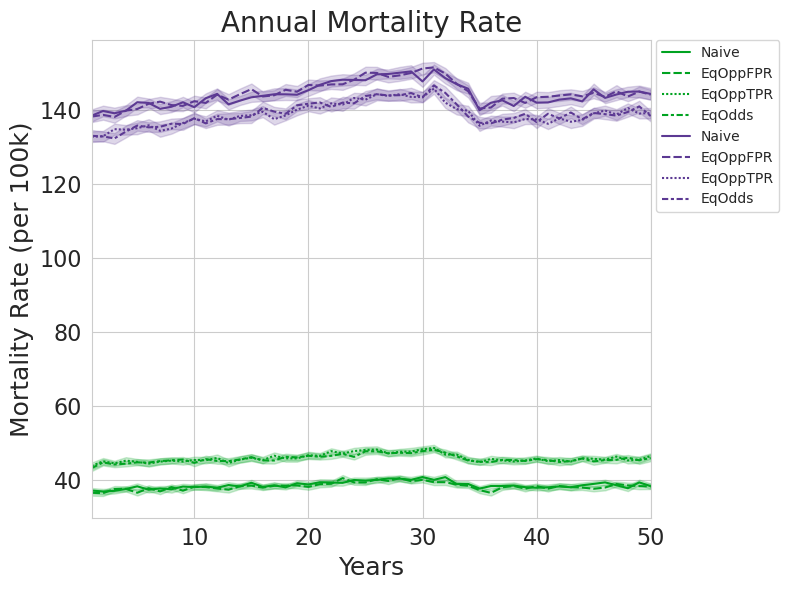

In [11]:
plt_MR(stats_df)

In [12]:
def plt_deltaMR(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(8,6))
    sns.lineplot(data=df, x ='year', y='deltaMR', style='ai_fairness', hue='ai_fairness', palette=MR_palette)
    plt.title(f'Annual Mortality Rate Disparity')
    plt.xlabel('Years')
    plt.ylabel('Mortality Rate Disparity (per 100k)')
    plt.xlim([1,50])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'deltaMR.png', dpi=800)
        plt.savefig(results_dir + 'deltaMR.svg')
    plt.show()

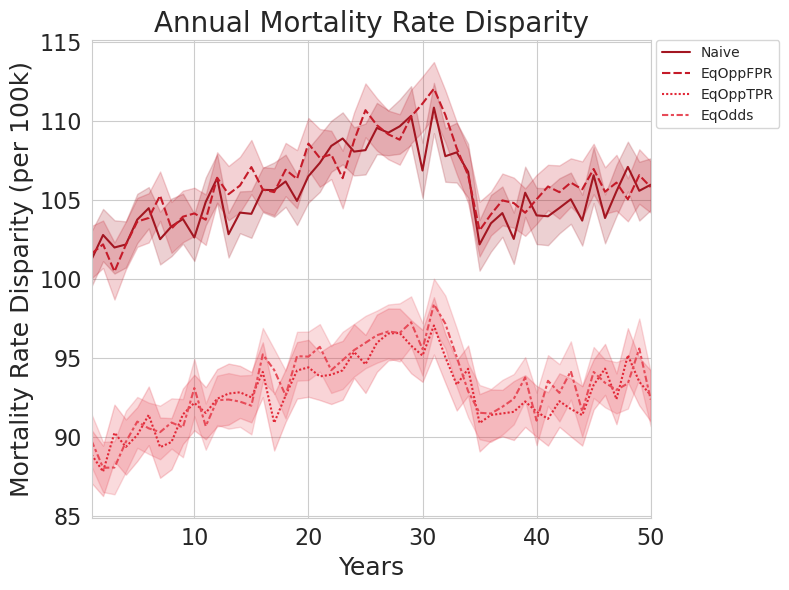

In [13]:
plt_deltaMR(stats_df)

In [15]:
def plt_MRratio(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(8,6))
    sns.lineplot(data=df, x ='year', y='MR_ratio', style='ai_fairness', hue='ai_fairness', palette=MR_palette)
    plt.title(f'Annual Mortality Rate Ratio')
    plt.xlabel('Years')
    plt.ylabel('Mortality Rate Ratio\n(Unprivileged/Privileged)')
    plt.xlim([1,50])
    plt.ylim([2.8,4.1])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'MR_ratio.png', dpi=800)
        plt.savefig(results_dir + 'MR_ratio.svg')
    plt.show()

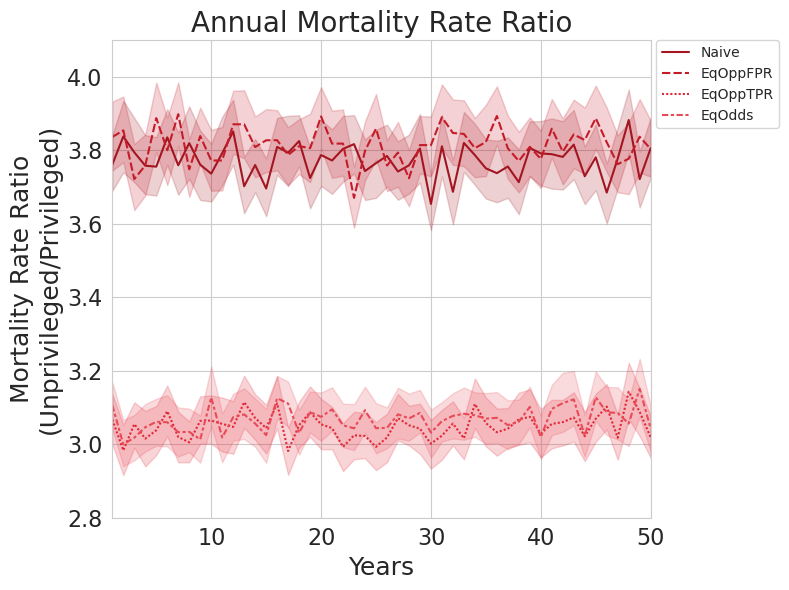

In [16]:
plt_MRratio(stats_df)

In [20]:
def plt_interdSEI(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(8.3,6))
    sns.lineplot(data=df, x ='year', y='inter_dSEI', style='ai_fairness', hue='ai_fairness', palette=SES_palette)
    plt.title(f'Annual Average SEI Disparity')
    plt.xlabel('Years')
    plt.ylabel('Average SEI Disparity')
    plt.xlim([1,50])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'dSEI.png', dpi=800)
        plt.savefig(results_dir + 'dSEI.svg')
    plt.show()

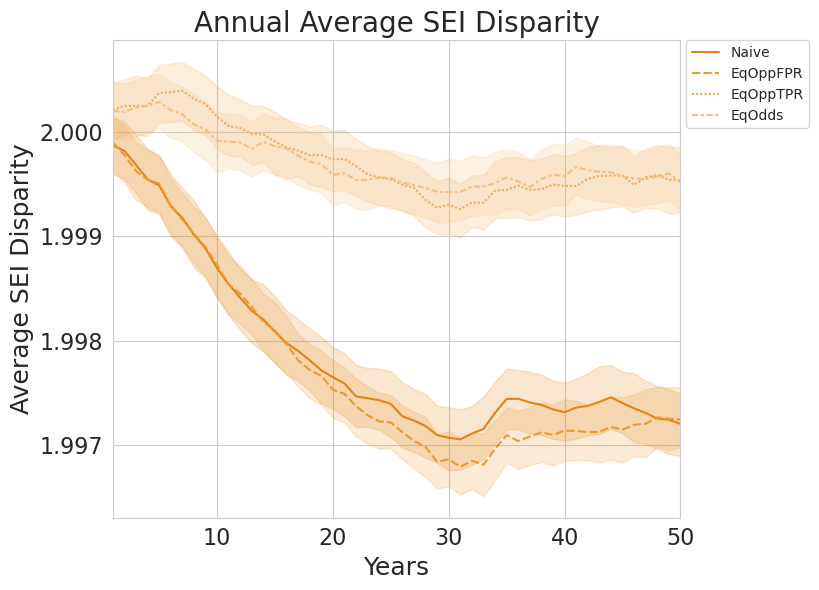

In [21]:
plt_interdSEI(stats_df)

In [18]:
def plt_change_interdSEI(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x ='year', y='change_inter_dSEI', style='ai_fairness', hue='ai_fairness', palette=SES_palette)
    plt.title(f'Annual Change in Average SEI Disparity')
    plt.xlabel('Years')
    plt.ylabel('Change in Average SEI Disparity (%)')
    plt.xlim([1,50])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'dSEI_change.png', dpi=800)
        plt.savefig(results_dir + 'dSEI_change.svg')
    plt.show()

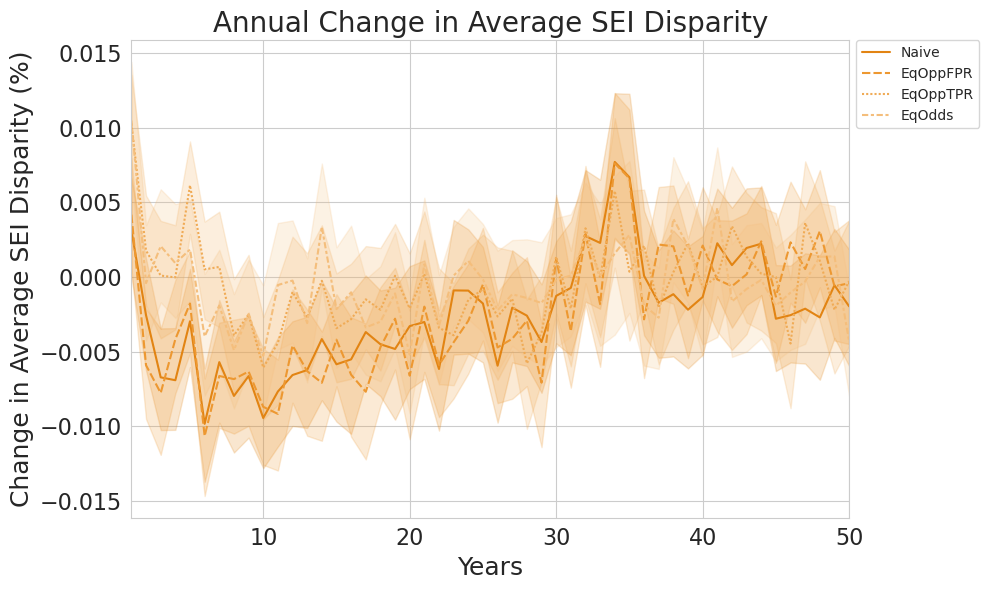

In [19]:
plt_change_interdSEI(stats_df)

In [24]:
def compute_avg_metrics(df, metric_col, ai_fairness):
    '''
    compute 50-year average for a single metric across all simulations
    '''

    #remove yr 1 from data
    df = df[df.year != 0]
    
    #get dataframe for specific fairness scenario
    df = df.loc[df['ai_fairness']==ai_fairness]
    
    stats = df.groupby(['n_sim'])[metric_col].agg(['mean', 'count', 'std'])
    # print(stats)
    print('-'*75)
    
    #get 95% confidence interval of average metric over all simulations
    m = stats['mean'].mean()
    s = stats['mean'].std()
    c = stats['mean'].count()

    ci95_hi = m + 1.96*s/math.sqrt(c)
    ci95_low = m - 1.96*s/math.sqrt(c)

    print(f'average(95%CI) {metric_col} for {ai_fairness} over {c} simulations: {m:.2f} ({ci95_low:.2f}, {ci95_hi:.2f})')
    print('-'*75)

In [25]:
compute_avg_metrics(stats_df, 'MR_unpriv', 'EqOdds')

---------------------------------------------------------------------------
average(95%CI) MR_unpriv for EqOdds over 100 simulations: 138.94 (138.72, 139.16)
---------------------------------------------------------------------------


In [26]:
for ai_fairness in ['Naive', 'EqOppTPR', 'EqOppFPR', 'EqOdds']:
    for metric in ['SEI_avg_priv', 'SEI_avg_unpriv', 'inter_dSEI', 'change_inter_dSEI']:
        compute_avg_metrics(stats_df, metric, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) SEI_avg_priv for Naive over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) SEI_avg_unpriv for Naive over 100 simulations: -1.02 (-1.02, -1.02)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) inter_dSEI for Naive over 100 simulations: 2.00 (2.00, 2.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) change_inter_dSEI for Naive over 100 simulations: -0.00 (-0.00, -0.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------

In [27]:
for ai_fairness in ['Naive', 'EqOppTPR', 'EqOppFPR', 'EqOdds']:
    for metric in ['MR_priv', 'MR_unpriv', 'deltaMR', 'MR_ratio']:
        compute_avg_metrics(stats_df, metric, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) MR_priv for Naive over 100 simulations: 38.58 (38.47, 38.68)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_unpriv for Naive over 100 simulations: 144.06 (143.86, 144.27)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) deltaMR for Naive over 100 simulations: 105.48 (105.26, 105.71)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_ratio for Naive over 100 simulations: 3.77 (3.76, 3.79)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
averag

In [28]:
for ai_fairness in ['Naive', 'EqOppTPR', 'EqOppFPR', 'EqOdds']:
    for metric in ['FPR_priv', 'FNR_priv', 'TPR_priv', 'FPR_unpriv', 'FNR_unpriv']:
        compute_avg_metrics(stats_df, metric, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) FPR_priv for Naive over 100 simulations: 15.00 (15.00, 15.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FNR_priv for Naive over 100 simulations: 22.96 (22.92, 23.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) TPR_priv for Naive over 100 simulations: 77.04 (77.00, 77.08)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FPR_unpriv for Naive over 100 simulations: 7.50 (7.50, 7.50)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(9

get deltaMR with confidence intervals between naive and eqodds scenarios

--> need to get deltaMR for every sim and then get CIs from that 

In [29]:
temp_df = stats_df[stats_df.year != 0]
temp_df

,year,n_priv,n_unpriv,n_healthy_priv,n_healthy_unpriv,n_BC_priv,n_BC_unpriv,n_died_priv,n_died_unpriv,n_screened_priv,...,MR_priv,MR_unpriv,deltaMR,MR_ratio,change_SEI_avg_priv,change_SEI_avg_unpriv,inter_dSEI,change_inter_dSEI,intra_dSEI_priv,intra_dSEI_unpriv
1,1,250091,249909,249217,248868,874,1041,89,381,246548,...,35.587046,152.455494,116.868447,4.284017,-0.254173,0.263126,1.999475,0.004891,4.675924,2.566883
2,2,250173,249827,249320,248852,853,975,96,320,246676,...,38.373446,128.088637,89.715192,3.337950,-0.142246,0.206365,2.000131,0.032790,4.675924,2.638839
3,3,250198,249802,249346,248802,852,1000,100,355,246865,...,39.968345,142.112553,102.144208,3.555628,-0.211435,0.189292,1.999933,-0.009883,4.675924,2.638839
4,4,250387,249613,249494,248598,893,1015,101,340,246917,...,40.337557,136.210854,95.873297,3.376775,-0.196024,0.201931,2.000024,0.004532,4.675924,2.666904
5,5,250411,249589,249493,248586,918,1003,86,368,246924,...,34.343539,147.442395,113.098856,4.293163,-0.150687,0.180215,2.000352,0.016406,4.675924,2.684976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,46,251407,248593,250523,247564,884,1029,117,341,248555,...,46.538084,137.172004,90.633920,2.947522,0.011948,-0.001268,1.998446,0.005148,5.329615,2.752916
5096,47,251406,248594,250530,247606,876,988,98,341,248639,...,38.980772,137.171452,98.190680,3.518952,-0.026096,0.002139,1.998215,-0.011570,5.329615,2.752916
5097,48,251411,248589,250547,247528,864,1061,106,342,248650,...,42.162037,137.576482,95.414444,3.263042,-0.003429,0.045682,1.998651,0.021841,5.329615,2.728010
5098,49,251382,248618,250460,247586,922,1032,101,348,248616,...,40.177897,139.973775,99.795878,3.483850,0.032072,-0.019597,1.998761,0.005479,5.329615,2.728010


In [30]:
#get dataframe for naive fairness scenario
eqodds_df = temp_df.loc[temp_df['ai_fairness']=='EqOdds']

eqodds_stats = eqodds_df.groupby(['n_sim'])['deltaMR'].agg(['mean', 'count', 'std'])
eqodds_stats

,mean,count,std
n_sim,,,
48960437,91.265617,50,8.347718
151712926,93.818007,50,9.458673
168388230,92.142069,50,8.557915
176092387,93.919799,50,8.319751
232150720,91.528803,50,7.830766
...,...,...,...
4018327298,92.630522,50,8.965010
4091952314,94.475756,50,9.738872
4172993659,93.003414,50,9.026175


In [31]:
#get dataframe for naive fairness scenario
naive_df = temp_df.loc[temp_df['ai_fairness']=='Naive']

naive_stats = naive_df.groupby(['n_sim'])['deltaMR'].agg(['mean', 'count', 'std'])
naive_stats

,mean,count,std
n_sim,,,
48960437,107.165280,50,8.440074
151712926,105.886210,50,8.574754
168388230,105.331029,50,9.100610
176092387,103.960735,50,9.444914
232150720,104.413687,50,8.286554
...,...,...,...
4018327298,104.052435,50,10.094660
4091952314,105.456705,50,8.411632
4172993659,106.123470,50,8.145118


In [32]:
delta_df = naive_stats['mean']-eqodds_stats['mean']
delta_df

n_sim
48960437      15.899663
151712926     12.068203
168388230     13.188961
176092387     10.040936
232150720     12.884885
                ...    
4018327298    11.421913
4091952314    10.980949
4172993659    13.120056
4209925572    11.866099
4280428995    13.740917
Name: mean, Length: 100, dtype: float64

In [33]:
#get 95% confidence interval of average metric over all simulations
m = delta_df.mean()
s = delta_df.std()
c = delta_df.count()

ci95_hi = m + 1.96*s/math.sqrt(c)
ci95_low = m - 1.96*s/math.sqrt(c)

print(f'{m:.3f}({ci95_low:.3f},{ci95_hi:.3f})')


12.222(11.913,12.531)
